<a href="https://colab.research.google.com/github/AbirN1234/Bangalore_house_rate_prediction/blob/master/Bengalore_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# load_data

In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/Bengaluru_House_Data.csv')

In [3]:
data.shape

(13320, 9)

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# area_type 

In [5]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
grp = data.groupby('area_type')
# grp.groups

In [7]:
grpd=list(grp.groups)
grpd

['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']

In [8]:
cnt = list(grp.size())
cnt

[2418, 87, 2025, 8790]

Text(0, 0.5, 'count')

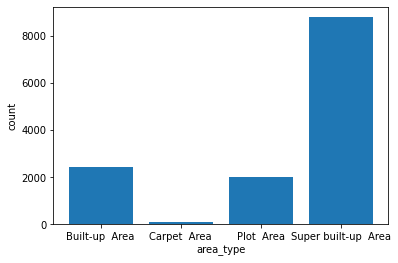

In [9]:
plt.bar(grpd,cnt)
plt.xlabel("area_type")
plt.ylabel("count")

In [10]:
# data["area_type"] = data["area_type"].astype(str).str.replace("Super built-up  Area","0")
# data["area_type"] = data["area_type"].astype(str).str.replace("Built-up  Area","1")
# data["area_type"] = data["area_type"].astype(str).str.replace("Plot  Area","2")
# data["area_type"] = data["area_type"].astype(str).str.replace("Carpet  Area","3")

In [11]:
le_area = LabelEncoder()
data['area_type'] = le_area.fit_transform(data['area_type'])
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# availability

In [12]:
data['availability'].unique

<bound method Series.unique of 0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object>

In [13]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
def replace_availabilty(ip):
    if ip == 'Ready To Move':
        return 0
    elif ip == 'Immediate Possession':
        return 1
    else:
        return 2

In [15]:
data['availability'] = data.availability.apply(replace_availabilty)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,2,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,0,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,3,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Clearing Null values

In [16]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
data=data.drop(['balcony','society'], axis = 1)

In [18]:
data.head()

,area_type,availability,location,size,total_sqft,bath,price
0,3,2,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,2,0,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,0,0,Uttarahalli,3 BHK,1440,2.0,62.00
3,3,0,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,3,0,Kothanur,2 BHK,1200,2.0,51.00


In [19]:
data.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [20]:
data=data.dropna()
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [21]:
data.shape

(13246, 7)

# size -> bhk

In [22]:
#now we will create a separate column BHK containing number of rooms
data['bhk']=data['size'].apply(lambda x:int(x.split(' ')[0]))

In [23]:
data.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,3,2,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,2,0,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,0,0,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,3,0,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,3,0,Kothanur,2 BHK,1200,2.0,51.00,2


In [24]:
data=data.drop(['size'], axis = 1)

In [25]:
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,3,2,Electronic City Phase II,1056,2.0,39.07,2
1,2,0,Chikka Tirupathi,2600,5.0,120.00,4
2,0,0,Uttarahalli,1440,2.0,62.00,3
3,3,0,Lingadheeranahalli,1521,3.0,95.00,3
4,3,0,Kothanur,1200,2.0,51.00,2


# total_sqft
dtype : object -> float

In [26]:
data['total_sqft'].describe()

count     13246
unique     2067
top        1200
freq        843
Name: total_sqft, dtype: object

In [27]:
def to_float(ip):
  return float(ip)

In [28]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [29]:
df=data
data['total_sqft']=data['total_sqft'].apply(convert_sqft_to_num)

In [30]:
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,3,2,Electronic City Phase II,1056.0,2.0,39.07,2
1,2,0,Chikka Tirupathi,2600.0,5.0,120.00,4
2,0,0,Uttarahalli,1440.0,2.0,62.00,3
3,3,0,Lingadheeranahalli,1521.0,3.0,95.00,3
4,3,0,Kothanur,1200.0,2.0,51.00,2


In [31]:
data.isnull().sum()

area_type        0
availability     0
location         0
total_sqft      46
bath             0
price            0
bhk              0
dtype: int64

In [32]:
data=data.dropna()
data.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
price           0
bhk             0
dtype: int64

In [33]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
data = data[~(data.total_sqft/data.bhk<300)]


# location

In [35]:
len(data.location.unique())

1215

In [36]:
data.location = data.location.apply(lambda x: x.strip())

location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats


location
Whitefield                              532
Sarjapur  Road                          388
Electronic City                         295
Kanakpura Road                          262
Thanisandra                             234
                                       ... 
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
Kengeri Satellite Town ( BDA SITE)        1
1 Giri Nagar                              1
Name: location, Length: 1205, dtype: int64

In [37]:
len(location_stats[location_stats<=10])

983

In [38]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
Dodsworth Layout                        10
Nagappa Reddy Layout                    10
Gunjur Palya                            10
Sadashiva Nagar                         10
Tindlu                                  10
                                        ..
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
Kengeri Satellite Town ( BDA SITE)       1
1 Giri Nagar                             1
Name: location, Length: 983, dtype: int64

In [39]:
len(data.location.unique())

1205

In [40]:
data.location = data.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x )
len(data.location.unique())

223

In [41]:
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,3,2,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,2,0,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,0,0,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,3,0,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,3,0,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [42]:
le_location = LabelEncoder()
data['location'] = le_location.fit_transform(data['location'])
data.head()

,area_type,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,3,2,74,1056.0,2.0,39.07,2,3699.810606
1,2,0,55,2600.0,5.0,120.00,4,4615.384615
2,0,0,209,1440.0,2.0,62.00,3,4305.555556
3,3,0,149,1521.0,3.0,95.00,3,6245.890861
4,3,0,142,1200.0,2.0,51.00,2,4250.000000


In [43]:
len(data["location"].unique())

223

In [44]:
data['location'].describe()

count    12456.000000
mean       144.288375
std         71.525688
min          0.000000
25%         87.000000
50%        155.000000
75%        216.000000
max        222.000000
Name: location, dtype: float64

# describe

In [45]:
data.describe()

,area_type,availability,location,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,2.316554,0.424374,144.288375,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1.162122,0.817746,71.525688,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,0.000000,0.000000,0.000000,300.000000,1.000000,9.000000,1.000000,267.829813
25%,2.000000,0.000000,87.000000,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,3.000000,0.000000,155.000000,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,3.000000,0.000000,216.000000,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,3.000000,2.000000,222.000000,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12456 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12456 non-null  int64  
 1   availability    12456 non-null  int64  
 2   location        12456 non-null  int64  
 3   total_sqft      12456 non-null  float64
 4   bath            12456 non-null  float64
 5   price           12456 non-null  float64
 6   bhk             12456 non-null  int64  
 7   price_per_sqft  12456 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 875.8 KB


# heatmap


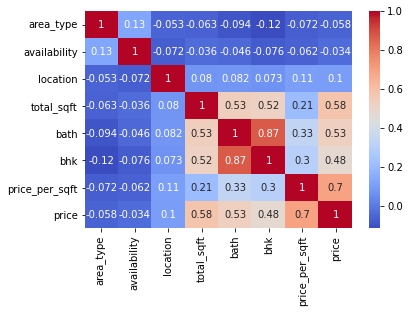

In [47]:
vars = ['area_type','availability','location','total_sqft','bath','bhk','price_per_sqft', "price"]
sns.heatmap(data[vars].corr(),cmap="coolwarm", annot=True)

# x, y allocation

In [48]:
data.dtypes

area_type           int64
availability        int64
location            int64
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [49]:
# x = data.drop(['price','area_type','availability','location'],axis=1)
# x.head()

x = data.drop(['price','availability','location'],axis=1)
x.head()


,area_type,total_sqft,bath,bhk,price_per_sqft
0,3,1056.0,2.0,2,3699.810606
1,2,2600.0,5.0,4,4615.384615
2,0,1440.0,2.0,3,4305.555556
3,3,1521.0,3.0,3,6245.890861
4,3,1200.0,2.0,2,4250.000000


In [50]:
y = data['price']
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

# train_test_split()

In [51]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

# LinearRegression()

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lr.score(x_test,y_test)

0.7872000448844598

# GradientBoostingRegressor()

In [55]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
# model = GradientBoostingRegressor(**params)
model = GradientBoostingRegressor(n_estimators = 700, max_depth = 3 , min_samples_split = 2,learning_rate = 0.01, loss = 'ls')
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=700,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
model.score(x_test,y_test)

0.9577130727381751

In [57]:
# https://github.com/Abhishekmamidi123/Predict-house-prices-in-Bangalore/blob/master/predict_house_prices.ipynb
# https://medium.com/@katalepriyanka/cleaning-the-data-from-bengaluru-house-price-dataset-5ceeb16de82e

# convert to file pickle 

In [58]:
import pickle

In [59]:
pickle.dump(model,open('model.pkl','wb'))

In [60]:
pickle.dump(lr,open('lr.pkl','wb'))

In [61]:
model = pickle.load(open('model.pkl','rb'))

In [62]:
print(model.predict([[3, 1440, 2, 3, 4305.55]]))

[61.28254232]


In [63]:
print(lr.predict([[3, 1440, 2, 3, 4305.55]]))

[52.96262497]
